<a href="https://colab.research.google.com/github/EG-Kim/pytorch_example_01/blob/master/2_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

선형 회귀 Linear Regression 는 연속 값을 예측하는 알고리즘

선형 회귀 분석에서는 종속 변수와 독립 변수 사이에 선형 관계가 존재한다고 가정 

-> 두 개 이상의 변수를 설명하는 가장 적합한 선/평면을 찾는다.

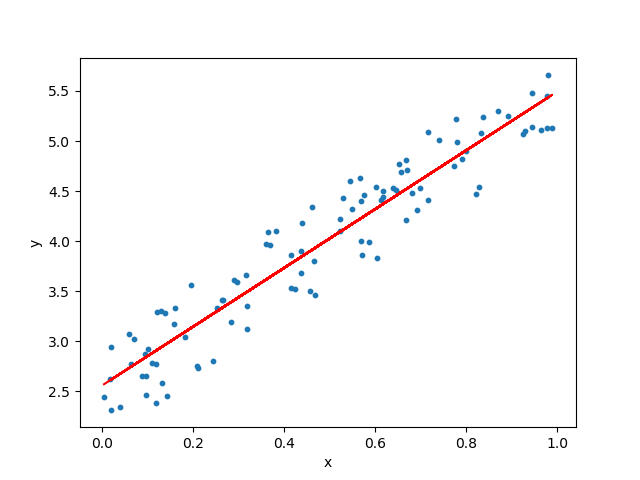

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

### 데이터 정의

In [ ]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

### 데이터 확인

In [ ]:
x_train.shape

(15, 1)

In [ ]:
y_train.shape

(15, 1)

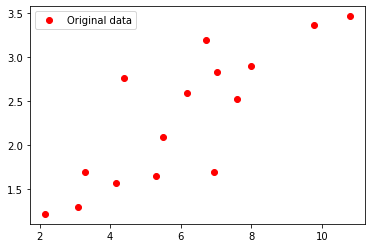

In [ ]:
plt.plot(x_train, y_train, 'ro', label='Original data') # 임의로 만든 데이터셋 그래프로 그려보기
plt.legend() # 범례
plt.show()

### 파라미터 설정

In [1]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

### Linear regression 모델 정의

torch.nn.Linear 클래스 사용. 전체가 연결된 완전 연결 층.

$y=x*w+b$

https://pytorch.org/docs/master/nn.html?highlight=linear#torch.nn.Linear

In [ ]:
# Linear regression model
model = nn.Linear(input_size, output_size)

### SGD와 MSE Loss 정의


https://pytorch.org/docs/master/generated/torch.nn.MSELoss.html#torch.nn.MSELoss

https://pytorch.org/docs/master/optim.html?highlight=optim%20sgd#torch.optim.SGD

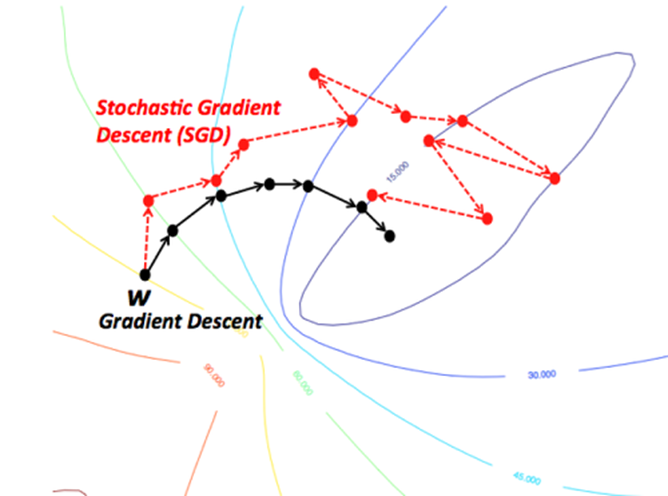

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

### 모델 학습

In [ ]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad() # tensor의 미분값 0으로 초기화
    loss.backward() # 미분
    optimizer.step() # 가중치 갱신
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

#### Prediction

In [ ]:
predicted = model(torch.from_numpy(x_train)).detach().numpy() # .detach().numpy() tensor를 분리해서 numpy로

In [ ]:
predicted

In [ ]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, 'bo', label='Predicted data')
plt.legend()
plt.show()